In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
path = "/home/hagen/Documents/master_project/Data_generation"

## Prove consistency of GCMC simulation

In [2]:
data_path = os.path.join(path, "Output")
N_df = pd.read_csv(os.path.join(data_path, "N.dat"),delimiter = "  ")
eta_df = pd.read_csv(os.path.join(data_path, "packing_fraction.dat"),delimiter = ";")

/tmp/ipykernel_281761/3354507789.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  N_df = pd.read_csv(os.path.join(data_path, "N.dat"),delimiter = "  ")


### Test plot particle numbers

Text(0.5, 1.0, 'Mean number of particles in the system')

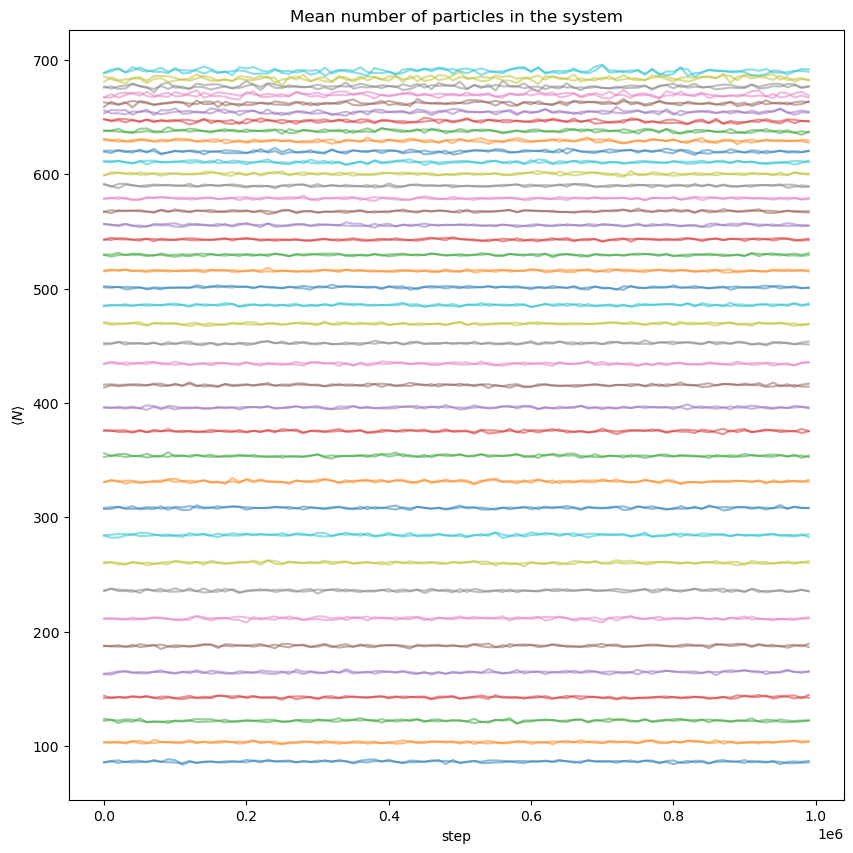

In [20]:
plt.figure(figsize=(10, 10))
for i in range(80):
    N_mean = np.array(N_df["N"].iloc[i*10000:(i+1)*10000].values).reshape(100, 100)
    N_mean = np.mean(N_mean, axis=1)
    plt.plot(np.array(N_df["step"].iloc[i*10000:(i+1)*10000].values)[::100],N_mean, label=f"mu ={N_df["mu"].iloc[i*10000]} rho={N_df["rho"].iloc[i*10000]}", alpha=0.5)
plt.xlabel("step")
plt.ylabel(r"$\langle N \rangle$")
plt.title("Mean number of particles in the system")


### Isothermal compressibility


#### Determine particle number statistics

In [6]:
N_means = np.zeros(160)
N_var = np.zeros(160)
for i in range(160):
    N_means[i] = np.mean(N_df["N"].iloc[i*10000:(i+1)*10000].values)
    N_var[i] = np.var(N_df["N"].iloc[i*10000:(i+1)*10000].values)
N_means = N_means.reshape(4,40)
N_var = N_var.reshape(4,40)
#N_means = np.mean(N_means, axis=0)

#### Through Fluctuation
$$
\kappa_T=\frac{1}{nk_{B}T} \frac{\langle(\delta N)^{2}\rangle}{\langle N \rangle }
$$

In [7]:
n_inv = (30*30)/N_means
kappa = n_inv * N_var/N_means

##### Plot it

Text(0.5, 1.0, '$\\kappa_T$ determined through $\\kappa_T=\\frac{1}{nk_{B}T} \\frac{\\langle(\\delta N)^{2}\\rangle}{\\langle N \\rangle }$')

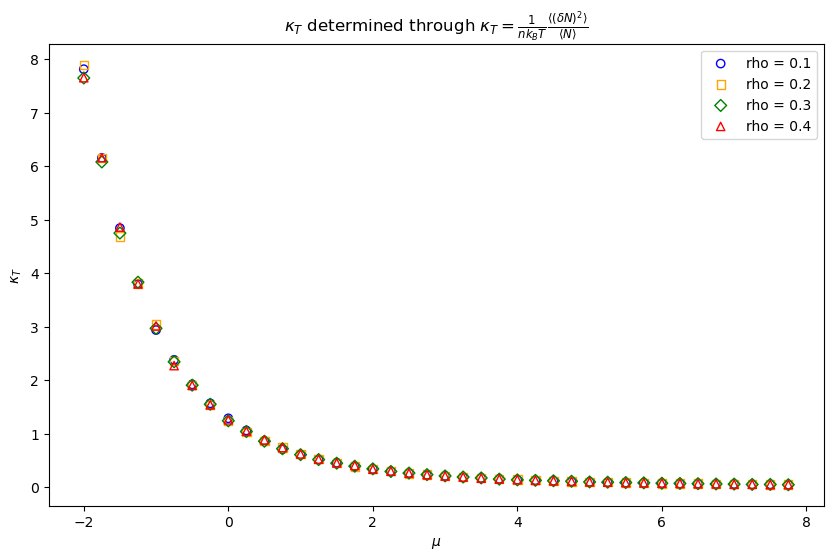

In [8]:
plt.figure(figsize=(10, 6))
markers = ["o", "s", "D", "^"]
colors = ["blue", "orange", "green", "red"]
for i in range(4):
    plt.scatter(N_df["mu"].iloc[0:40*10000:10000], kappa[i,:], label=f"rho = {N_df["rho"].iloc[i*40*10000]}", marker=markers[i],facecolors="none", edgecolors=colors[i])
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\kappa_T$")
plt.legend()
plt.title(r"$\kappa_T$ determined through $\kappa_T=\frac{1}{nk_{B}T} \frac{\langle(\delta N)^{2}\rangle}{\langle N \rangle }$")

#### Through numerical derivative
$$
\kappa_T=\frac{1}{ n^{2}V} \frac{ \partial N }{ \partial \mu } |_{V,T}
$$

In [9]:
deriv = np.gradient(N_means,N_df["mu"].iloc[0:40*10000:10000],axis=1)
kappa2 = n_inv *deriv/N_means

##### Plot it

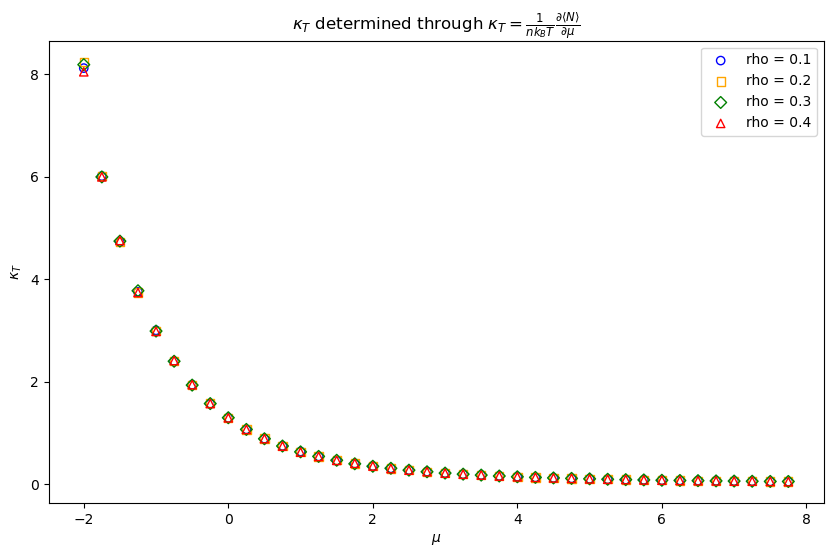

In [10]:
plt.figure(figsize=(10, 6))
markers = ["o", "s", "D", "^"]
colors = ["blue", "orange", "green", "red"]
for i in range(4):
    plt.scatter(N_df["mu"].iloc[0:40*10000:10000], kappa2[i,:], label=f"rho = {N_df["rho"].iloc[i*40*10000]}", marker=markers[i],facecolors="none", edgecolors=colors[i])
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\kappa_T$")
plt.title(r"$\kappa_T$ determined through $\kappa_T=\frac{1}{nk_{B}T} \frac{\partial \langle N \rangle}{\partial \mu}$")
plt.legend()

#### Compare

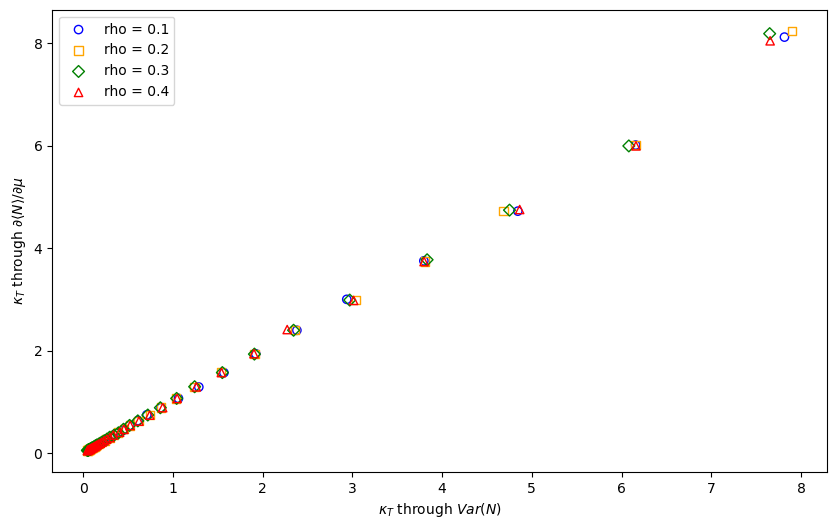

In [11]:
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.scatter(kappa[i,:], kappa2[i,:], label=f"rho = {N_df["rho"].iloc[i*40*10000]}", marker=markers[i],facecolors="none", edgecolors=colors[i])
plt.xlabel(r"$\kappa_T$ through $Var(N)$")
plt.ylabel(r"$\kappa_T$ through $\partial \langle N \rangle/\partial \mu$")
plt.legend()

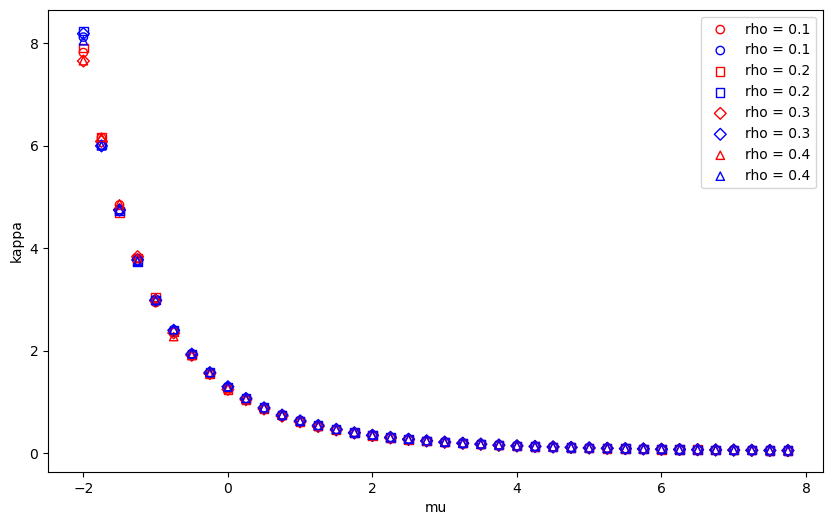

In [12]:
plt.figure(figsize=(10, 6))
markers = ["o", "s", "D", "^"]
colors = ["blue", "orange", "green", "red"]
for i in range(4):
    plt.scatter(N_df["mu"].iloc[0:40*10000:10000], kappa[i,:], label=f"rho = {N_df["rho"].iloc[i*40*10000]}", marker=markers[i],facecolors="none", edgecolors="red")
    plt.scatter(N_df["mu"].iloc[0:40*10000:10000], kappa2[i,:], label=f"rho = {N_df["rho"].iloc[i*40*10000]}", marker=markers[i],facecolors="none", edgecolors="blue")
plt.xlabel("mu")
plt.ylabel("kappa")
plt.legend()

Text(0.5, 1.0, 'Fluctuation response theorem $\\frac{\\partial \\langle N \\rangle}{\\partial \\mu} = \\frac{1}{nk_{B}T} \\langle(\\delta N)^{2}\\rangle$')

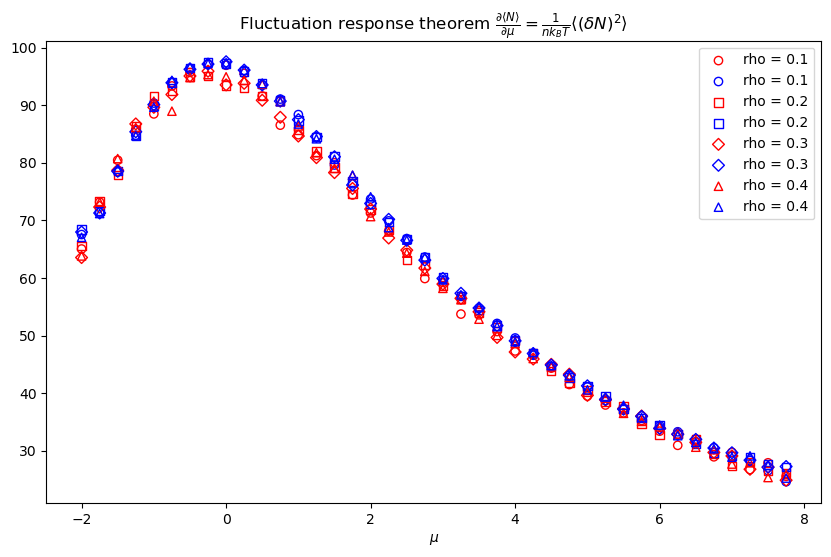

In [23]:
plt.figure(figsize=(10, 6))
markers = ["o", "s", "D", "^"]
colors = ["blue", "orange", "green", "red"]
for i in range(4):
    plt.scatter(N_df["mu"].iloc[0:40*10000:10000], N_var[i,:], label=f"rho = {N_df["rho"].iloc[i*40*10000]}", marker=markers[i],facecolors="none", edgecolors="red")
    plt.scatter(N_df["mu"].iloc[0:40*10000:10000], deriv[i,:], label=f"rho = {N_df["rho"].iloc[i*40*10000]}", marker=markers[i],facecolors="none", edgecolors="blue")
plt.xlabel(r"$\mu$")
plt.legend()
plt.title(r"Fluctuation response theorem $\frac{\partial \langle N \rangle}{\partial \mu} = \frac{1}{nk_{B}T} \langle(\delta N)^{2}\rangle$")